# Problem Statement 

In [2]:
# predicting house price..

In [3]:
# import libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
# import dataset
data=pd.read_csv("data.csv")

In [5]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [9]:
for col in data:
    print(col)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


In [10]:
for col,dtype in zip(data.columns,data.dtypes):
    print(f"{col} : {dtype}")

Id : int64
MSSubClass : int64
MSZoning : object
LotFrontage : float64
LotArea : int64
Street : object
Alley : object
LotShape : object
LandContour : object
Utilities : object
LotConfig : object
LandSlope : object
Neighborhood : object
Condition1 : object
Condition2 : object
BldgType : object
HouseStyle : object
OverallQual : int64
OverallCond : int64
YearBuilt : int64
YearRemodAdd : int64
RoofStyle : object
RoofMatl : object
Exterior1st : object
Exterior2nd : object
MasVnrType : object
MasVnrArea : float64
ExterQual : object
ExterCond : object
Foundation : object
BsmtQual : object
BsmtCond : object
BsmtExposure : object
BsmtFinType1 : object
BsmtFinSF1 : int64
BsmtFinType2 : object
BsmtFinSF2 : int64
BsmtUnfSF : int64
TotalBsmtSF : int64
Heating : object
HeatingQC : object
CentralAir : object
Electrical : object
1stFlrSF : int64
2ndFlrSF : int64
LowQualFinSF : int64
GrLivArea : int64
BsmtFullBath : int64
BsmtHalfBath : int64
FullBath : int64
HalfBath : int64
BedroomAbvGr : int64
Kitche

In [11]:
data.describe(include=object)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
# checking missing values 
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [14]:
for col, missing_values in data.isnull().sum().items():
    print(f"{col} : {missing_values}")


Id : 0
MSSubClass : 0
MSZoning : 0
LotFrontage : 259
LotArea : 0
Street : 0
Alley : 1369
LotShape : 0
LandContour : 0
Utilities : 0
LotConfig : 0
LandSlope : 0
Neighborhood : 0
Condition1 : 0
Condition2 : 0
BldgType : 0
HouseStyle : 0
OverallQual : 0
OverallCond : 0
YearBuilt : 0
YearRemodAdd : 0
RoofStyle : 0
RoofMatl : 0
Exterior1st : 0
Exterior2nd : 0
MasVnrType : 872
MasVnrArea : 8
ExterQual : 0
ExterCond : 0
Foundation : 0
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinSF1 : 0
BsmtFinType2 : 38
BsmtFinSF2 : 0
BsmtUnfSF : 0
TotalBsmtSF : 0
Heating : 0
HeatingQC : 0
CentralAir : 0
Electrical : 1
1stFlrSF : 0
2ndFlrSF : 0
LowQualFinSF : 0
GrLivArea : 0
BsmtFullBath : 0
BsmtHalfBath : 0
FullBath : 0
HalfBath : 0
BedroomAbvGr : 0
KitchenAbvGr : 0
KitchenQual : 0
TotRmsAbvGrd : 0
Functional : 0
Fireplaces : 0
FireplaceQu : 690
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageCars : 0
GarageArea : 0
GarageQual : 81
GarageCond : 81
PavedDrive : 0
WoodDeckSF

In [15]:
# looping the all the col by ascending order
missing_value= data.isnull().sum().sort_values(ascending=False)
for col, missing in missing_value.items():
    print(f"{col} : {missing}")

PoolQC : 1453
MiscFeature : 1406
Alley : 1369
Fence : 1179
MasVnrType : 872
FireplaceQu : 690
LotFrontage : 259
GarageYrBlt : 81
GarageCond : 81
GarageType : 81
GarageFinish : 81
GarageQual : 81
BsmtFinType2 : 38
BsmtExposure : 38
BsmtQual : 37
BsmtCond : 37
BsmtFinType1 : 37
MasVnrArea : 8
Electrical : 1
Id : 0
Functional : 0
Fireplaces : 0
KitchenQual : 0
KitchenAbvGr : 0
BedroomAbvGr : 0
HalfBath : 0
FullBath : 0
BsmtHalfBath : 0
TotRmsAbvGrd : 0
GarageCars : 0
GrLivArea : 0
GarageArea : 0
PavedDrive : 0
WoodDeckSF : 0
OpenPorchSF : 0
EnclosedPorch : 0
3SsnPorch : 0
ScreenPorch : 0
PoolArea : 0
MiscVal : 0
MoSold : 0
YrSold : 0
SaleType : 0
SaleCondition : 0
BsmtFullBath : 0
HeatingQC : 0
LowQualFinSF : 0
LandSlope : 0
OverallQual : 0
HouseStyle : 0
BldgType : 0
Condition2 : 0
Condition1 : 0
Neighborhood : 0
LotConfig : 0
YearBuilt : 0
Utilities : 0
LandContour : 0
LotShape : 0
Street : 0
LotArea : 0
MSZoning : 0
OverallCond : 0
YearRemodAdd : 0
2ndFlrSF : 0
BsmtFinSF2 : 0
1stFlrSF 

In [16]:
# checking Missing counts
missing_count=data.isnull().sum().sort_values(ascending=False)
missing_count

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [17]:
# checking missing percentage 
missing_percentage= (missing_count/len(data))*100
missing_percentage

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
MasVnrType     59.726027
                 ...    
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64

In [18]:
# creating dataframe with missing_count and missing percenatge for better understnding
df_missing_values=pd.DataFrame({"missing_count":missing_count,"missing_percentage":missing_percentage,"dtypes":data.dtypes}).sort_values(by='missing_percentage', ascending=False)
df_missing_values.head(20)

,missing_count,missing_percentage,dtypes
PoolQC,1453,99.520548,object
MiscFeature,1406,96.301370,object
Alley,1369,93.767123,object
Fence,1179,80.753425,object
MasVnrType,872,59.726027,object
FireplaceQu,690,47.260274,object
LotFrontage,259,17.739726,float64
GarageFinish,81,5.547945,object
GarageQual,81,5.547945,object
GarageType,81,5.547945,object


In [19]:
# as we can 5 columns in missing were above 50% so droping those columns to avoid misleading the model
high_missing_col=['PoolQC','MiscFeature','Alley','Fence','MasVnrType']
data.drop(columns=high_missing_col,inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [21]:
# checking data shape [Rows, columns]
data.shape

(1460, 76)

In [22]:
# checking missing values 
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64

In [23]:
# checking duplicates 
data.duplicated().sum()

0

# Exploratory Data Analysis

In [25]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


# Univariate Analysis

## Checking num_col with histplot in univariate

<Axes: xlabel='SalePrice', ylabel='Count'>

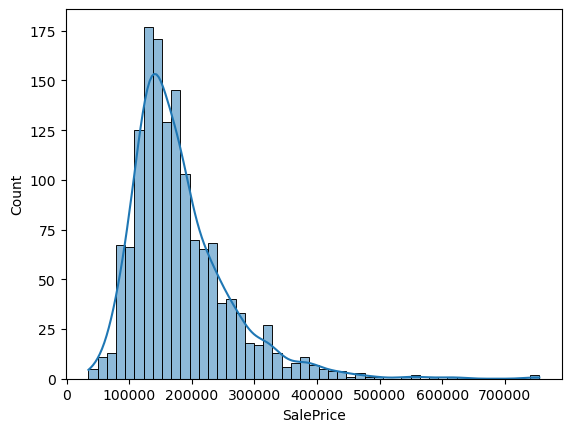

In [28]:
# checking Target value distribution
sns.histplot(data=data,x='SalePrice',kde=True)

#### insights
1. The SalePrice distribution is positively skewed (right-skewed).
2. Most houses are priced in the low to medium range
3. Very few houses have extremely high prices
4. The peak of the distribution lies around the middle price range.

<Axes: xlabel='GrLivArea', ylabel='Count'>

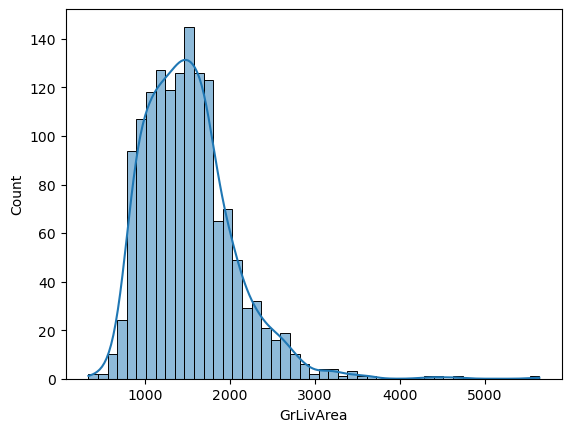

In [30]:
# checking GrLivArea [ Ground living area] with histplot
sns.histplot(data=data,x='GrLivArea',kde=True)

### Insights
1. it clearly showing right-skewed so it is not normal distribution
2. Most houses have medium living area.
3. Few houses have very large living area

<Axes: xlabel='LotArea', ylabel='Count'>

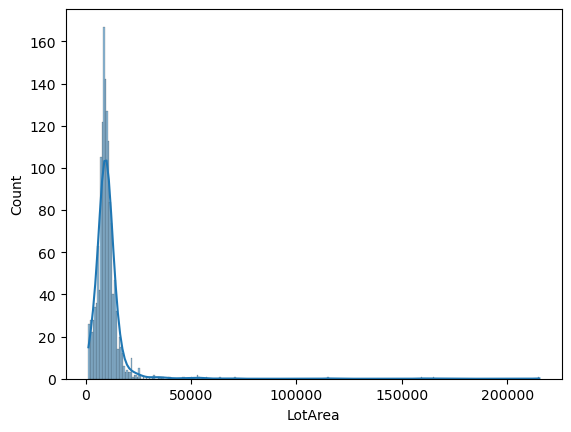

In [32]:
# checking LotArea [ plot area] with histplot
sns.histplot(data=data,x='LotArea',kde=True)

### Insights
1. Distribution is highly right-skewed
2. Majority of houses have small to medium plot size
3. Very few houses have very large plots

<Axes: xlabel='TotalBsmtSF', ylabel='Count'>

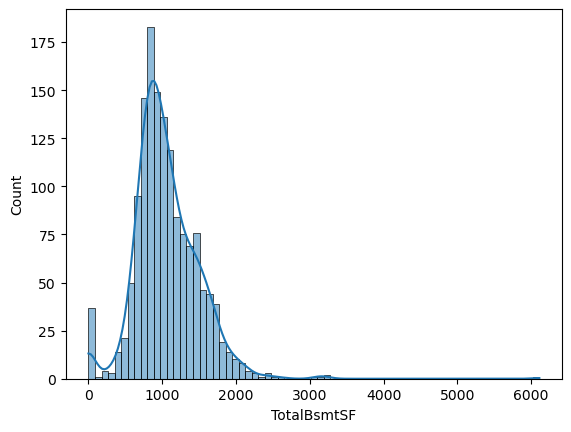

In [34]:
# checking TotalBsmtSF[Total basement area] with histplot
sns.histplot(data=data,x='TotalBsmtSF',kde=True)

### Insights
1. It is not normal distribution , right skewed distibution
1. Many houses have small to medium basement area
2. Some houses have no basement (value near 0)
3. Few houses have very large basements (outliers)

<Axes: xlabel='GarageArea', ylabel='Count'>

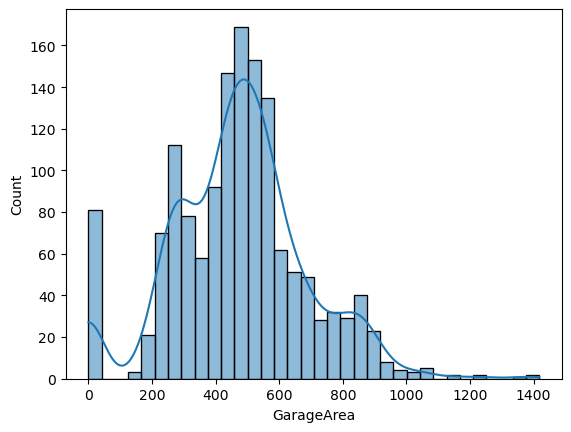

In [36]:
# checking GarageArea[Garage size] with histplot
sns.histplot(data=data,x='GarageArea',kde=True)

### Insights
1. It is not normal distribution but very to close to normal distribution
2. Most houses have medium-sized garages
3. Few houses have very large garages


<Axes: xlabel='1stFlrSF', ylabel='Count'>

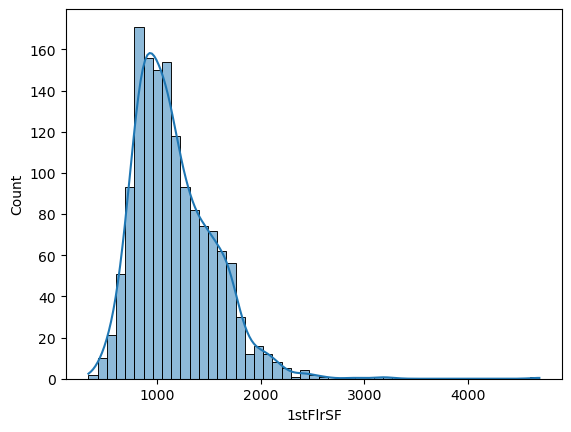

In [38]:
# checking 1stFlrSF[First floor area] with histplot
sns.histplot(data=data,x='1stFlrSF',kde=True)

### Insights 
1. It clearly showing right skewed distribution
2. Larger first floors are less common

<Axes: xlabel='YearBuilt', ylabel='Count'>

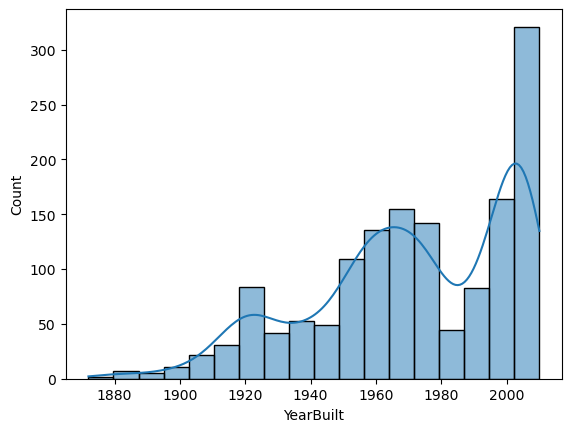

In [40]:
# checking YearBuilt with histplot
sns.histplot(data=data,x='YearBuilt',kde=True)

### insights
1. it showing more houses are build in 1960 ,
2. even 1990 to 2000 between more houses are build
3. it shows claerly age distribution

<Axes: xlabel='YearRemodAdd', ylabel='Count'>

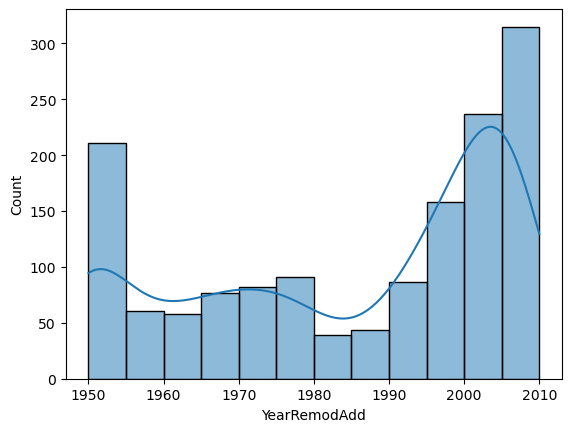

In [42]:
# checking YearRemodAdd with histplot
sns.histplot(data=data,x='YearRemodAdd',kde=True)

### insights
1. Indicates renovation trends
2. Many houses may have been remodeled recently.

## Checking cat_col with countplot in univariate

<Axes: xlabel='OverallQual', ylabel='count'>

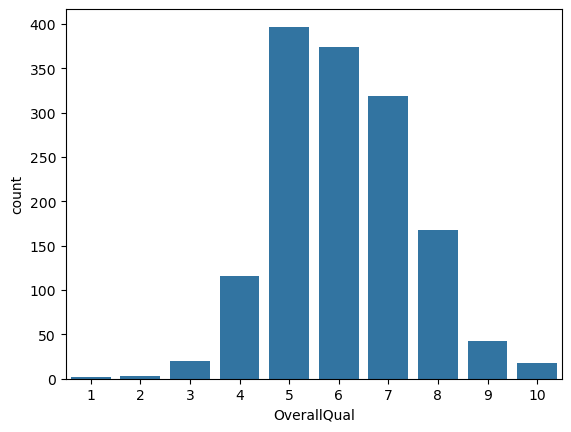

In [45]:
# checking OverallQual with countplot
sns.countplot(x=data['OverallQual'])

### Insights
1. OverallQual ranges from 1 to 10, representing very poor to excellent quality.
2. The majority of houses fall in the 5–7 range, indicating average to above-average quality.
3. Very few houses have very low quality (1–3).
4. Very few houses have very high quality (9–10).
5. Since this feature represents overall construction quality, it is likely to have a strong impact on SalePrice.

<Axes: xlabel='GarageCars', ylabel='count'>

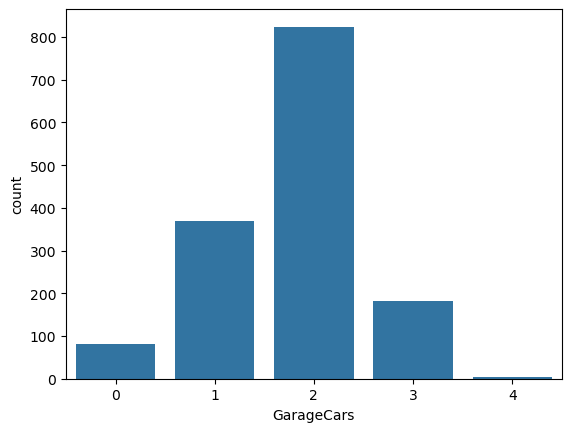

In [47]:
# checking GarageCars[no.of cars in Garage] with countplot
sns.countplot(data=data,x='GarageCars')

### insights
1. Most houses have 1 or 2 car garages.
2. Very few houses have 3 or more cars garage
3. Houses with 0 cars garage are also present.


# Bivariate Analysis — Numerorical vs SalePrice by using scatterplot

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

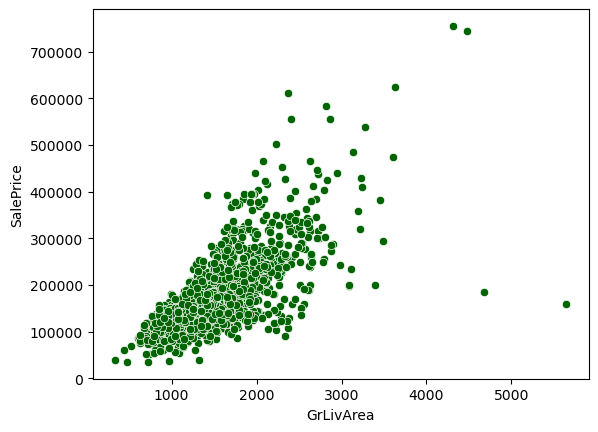

In [50]:
#By using Bivariate Analysis GrLivArea vs SalePrice (Scatter Plot)
sns.scatterplot(data=data,x="GrLivArea",y="SalePrice",color='darkgreen')

### Insights
1. As GrLivArea increases, SalePrice generally increases → positive relationship.
2. CHouses with very large GrLivArea tend to have higher prices.

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

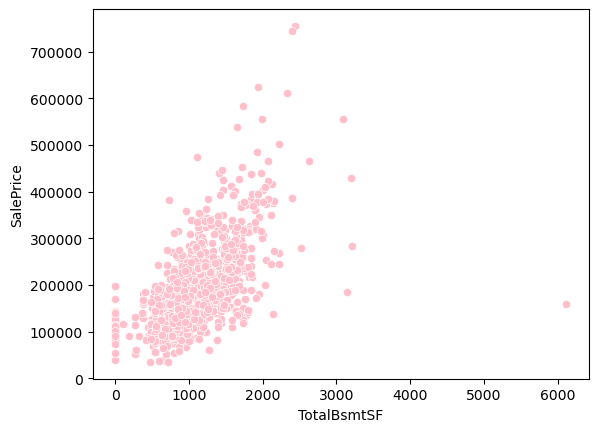

In [52]:
#By using Bivariate Analysis TotalBsmtSF vs SalePrice (Scatter Plot)
sns.scatterplot(data=data,x='TotalBsmtSF',y='SalePrice',color='pink')


### Insights
1. Houses with larger basement area tend to be more expensive.
2. Some houses have TotalBsmtSF = 0 (no basement).
3. Overall, there is a positive relationship.

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

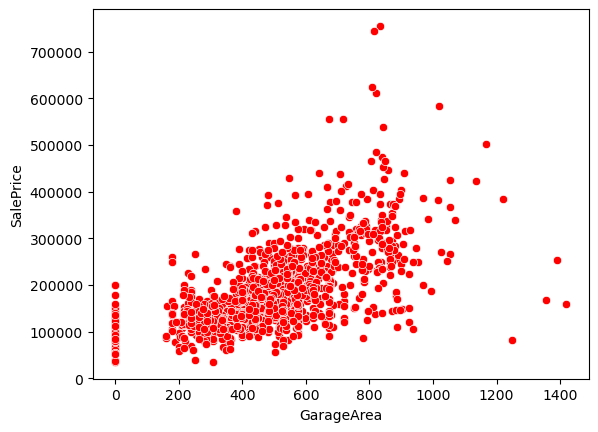

In [54]:
#By using Bivariate Analysis GarageArea vs SalePrice (Scatter Plot)
sns.scatterplot(data=data,x='GarageArea',y='SalePrice',color='red')

### insights
1. Bigger garage → generally higher price
2. A few houses have very large garages
3. Clear upward trend is visible.
4. A few houses are zer0 garages 

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

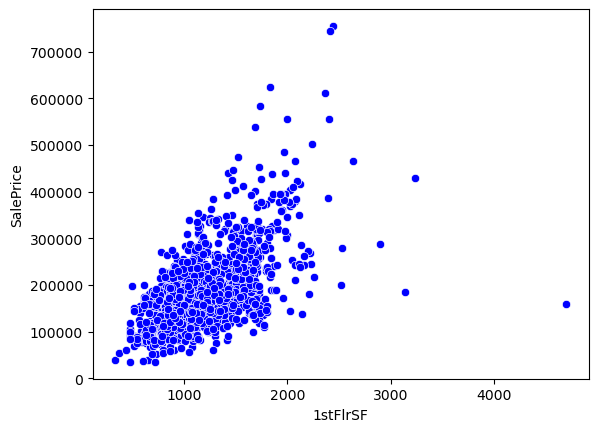

In [56]:
#By using Bivariate Analysis 1stFlrSF vs SalePrice (Scatter Plot)
sns.scatterplot(data=data,x='1stFlrSF',y='SalePrice',color='blue')

### insights
1. Larger first floor area tends to increase house price.
2. Relationship is positive but not perfectly linear
3. Some extreme values exist on the higher side

<Axes: xlabel='LotArea', ylabel='SalePrice'>

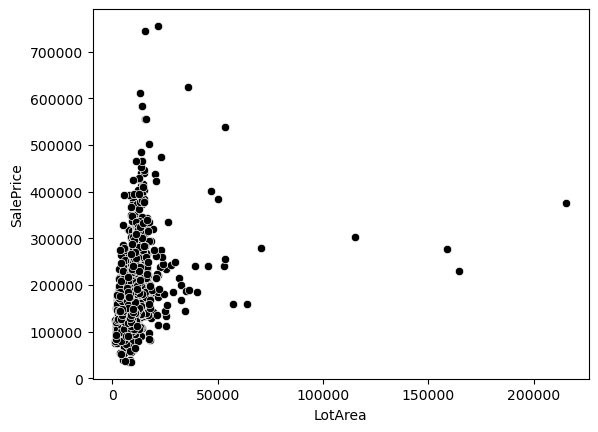

In [58]:
#By using Bivariate Analysis LotArea vs SalePrice (Scatter Plot)
sns.scatterplot(data=data,x='LotArea',y='SalePrice',color='black')

### insights
1. Larger plot size generally increases price, but relationship is weaker.
2. Many extreme values (very large lots) cause high scatter.

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

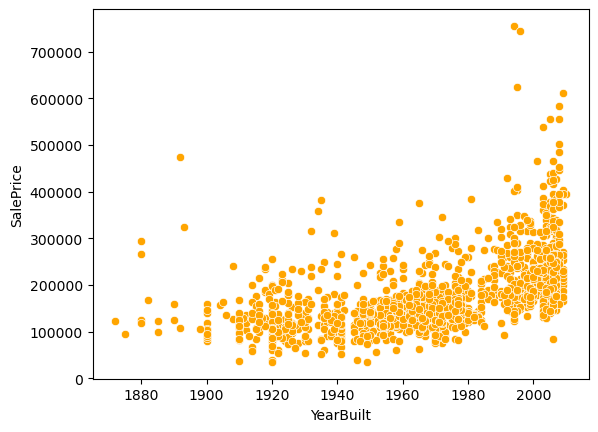

In [60]:
#By using Bivariate Analysis YearBuilt vs SalePrice (Scatter Plot)
sns.scatterplot(data=data,x='YearBuilt',y='SalePrice',color='orange')

###  insights
1. Newer houses generally have higher prices.
2. Older houses tend to be cheaper unless renovated
3. Trend is moderately positive

<Axes: xlabel='YearRemodAdd', ylabel='SalePrice'>

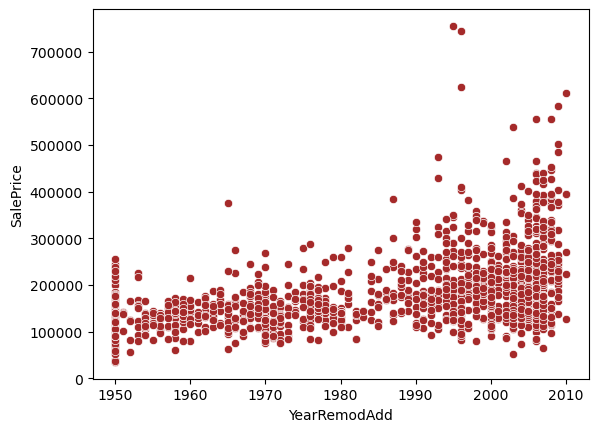

In [62]:
#By using Bivariate Analysis YearRemodAdd vs SalePrice(Scatter Plot)
sns.scatterplot(data=data,x='YearRemodAdd',y='SalePrice',color='brown')

### insights
1. Recently remodeled houses tend to have higher prices.
2. Renovation has a noticeable impact on value
3. Positive relationship is visible

# Bivariate Analysis — Categorical vs SalePrice by using scatterplot

<Axes: xlabel='SalePrice', ylabel='Count'>

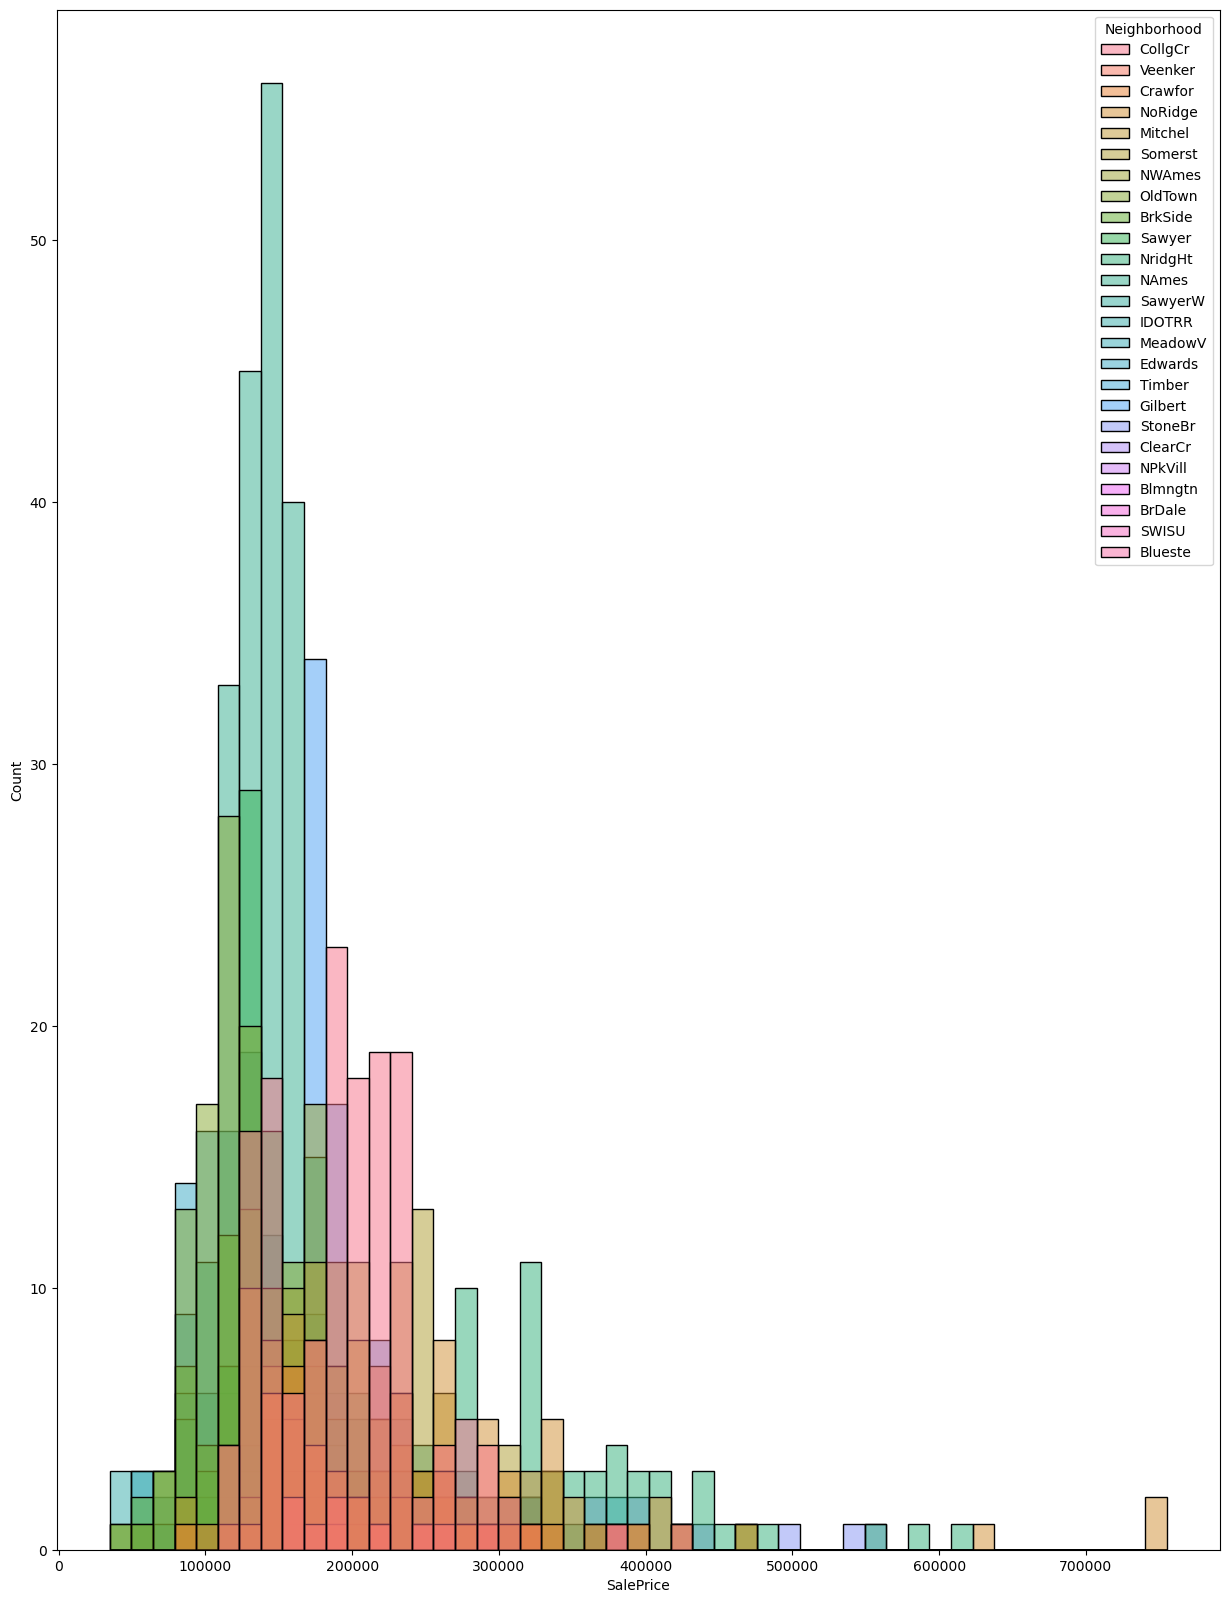

In [65]:
#By using Bivariate Analysis Neighborhood vs SalePrice(hist Plot)
plt.figure(figsize=(15,20))
sns.histplot(data=data,hue='Neighborhood',x='SalePrice',color='skyblue')

### insights
1. House prices vary significantly across neighborhoods.
2. Some neighborhoods consistently have higher prices
3. Some neighborhoods have lower median prices
4. This shows location strongly affects house price

# Multivariate Analysis

In [68]:
# creating Correlation Heatmap

In [69]:
num_col=data.select_dtypes(exclude='object').columns

In [70]:
# heatmap will work on only numorical cal 
num_col=data[num_col]


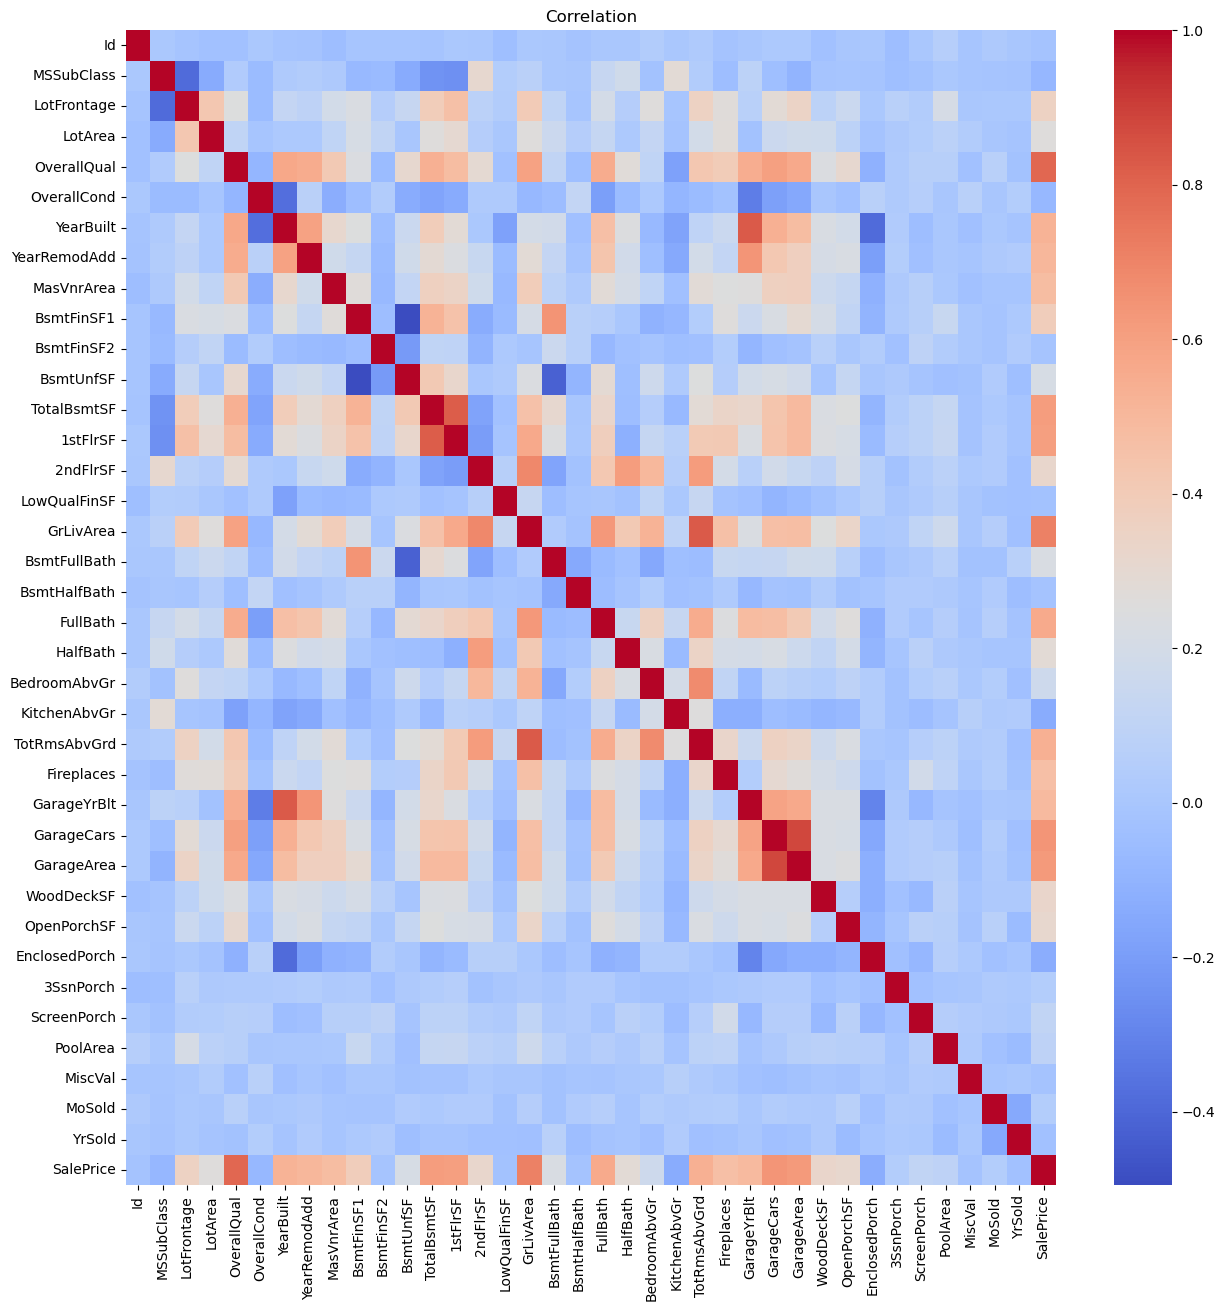

In [71]:
plt.figure(figsize=(15,15))
sns.heatmap(num_col.corr(),cmap='coolwarm',annot=False)
plt.title("Correlation")
plt.show()

### Insights
1. The heatmap shows how strongly each variable is related to every other variable.
2. Dark red → strong positive correlation (both increase together).
3. Dark blue → strong negative correlation (one increases, other decreases).
4. SalePrice shows strong positive correlation with:
   1. OverallQual
   2. GrLivArea
   3. GarageCars
   4. GarageArea
   5. TotalBsmtSF
6. This confirms that these are important features for prediction

In [73]:
# Correlation with SalePrice (clean table)
corr_with_target=num_col.corr()['SalePrice'].sort_values(ascending=False)
corr_with_target.head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

### insights
1. This list shows the top features most related to SalePrice.
2. Features with high positive correlation are most useful for prediction.
3. Features with very low correlation contribute less to the model.

# creating pair plot only important columns

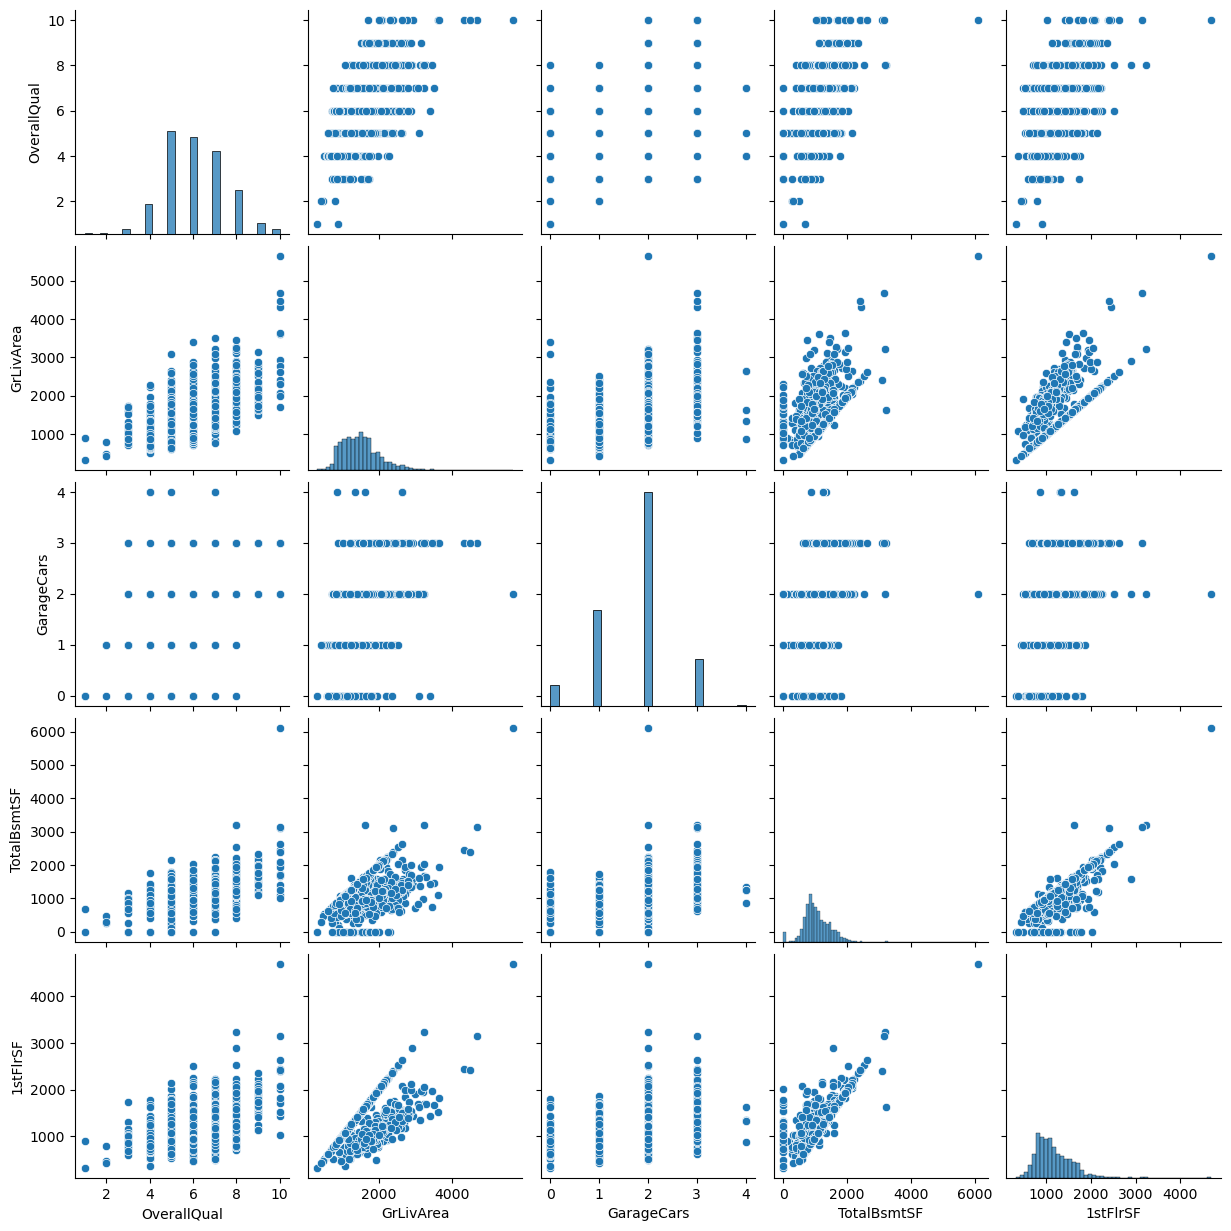

In [76]:
Imp_col=['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','1stFlrSF']
sns.pairplot(data[Imp_col])

# Data Preprocessing

### removing less corelation values 

In [79]:
# removing less corelation values 

num_col=data.select_dtypes(exclude='object').columns

In [80]:
# As per heatmap num_col only can check so i divided seperatly num_col
num_col

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [81]:
# created dataset 
num_data=data[num_col]

In [82]:
corr_matrix=num_data.corr()

In [83]:
# comparing less than 1 values and greter than 0.8
High_corre_pairs=(corr_matrix.abs().unstack().sort_values(ascending=False))
High_corre_pairs=High_corre_pairs[(High_corre_pairs<1) & (High_corre_pairs>=0.8)]
High_corre_pairs.head(10)

GarageArea    GarageCars      0.882475
GarageCars    GarageArea      0.882475
GarageYrBlt   YearBuilt       0.825667
YearBuilt     GarageYrBlt     0.825667
GrLivArea     TotRmsAbvGrd    0.825489
TotRmsAbvGrd  GrLivArea       0.825489
TotalBsmtSF   1stFlrSF        0.819530
1stFlrSF      TotalBsmtSF     0.819530
dtype: float64

In [84]:
# we can see 4 columns are less corelation so we are dropping those columns
drop_col=['GarageArea','GarageYrBlt','GrLivArea','TotalBsmtSF']
data.drop(columns=drop_col,inplace=True,errors='ignore')

In [85]:
data.shape

(1460, 72)

In [86]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


### handling missing values 

In [88]:
# handling missing values 
cat_col=data.select_dtypes(include='object').columns

In [89]:
cat_col

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [90]:
num_col=data.select_dtypes(exclude='object').columns

In [91]:
num_col

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [92]:
for col in num_col:
    data.loc[data[col].isnull(),col]=data[col].median()

In [93]:
for col1 in cat_col:
    data.loc[data[col1].isnull(),col1]=data[col1].mode()[0]

In [94]:
# after implementaion checking missing values
data.isnull().sum().sort_values(ascending=False)

Id              0
MSSubClass      0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
               ..
Exterior2nd     0
Exterior1st     0
RoofMatl        0
RoofStyle       0
SalePrice       0
Length: 72, dtype: int64

### handling outliers

In [96]:
num_col=data.select_dtypes(include=['int64','float64']).columns

In [97]:
num_col.shape

(34,)

In [98]:
# outliers can handle only numerical columns so i am sepertating columns

num_col

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [99]:
# checking what are columns are having outliers
for col in num_col:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    data[col]=data[col].clip(lower=lower,upper=upper)

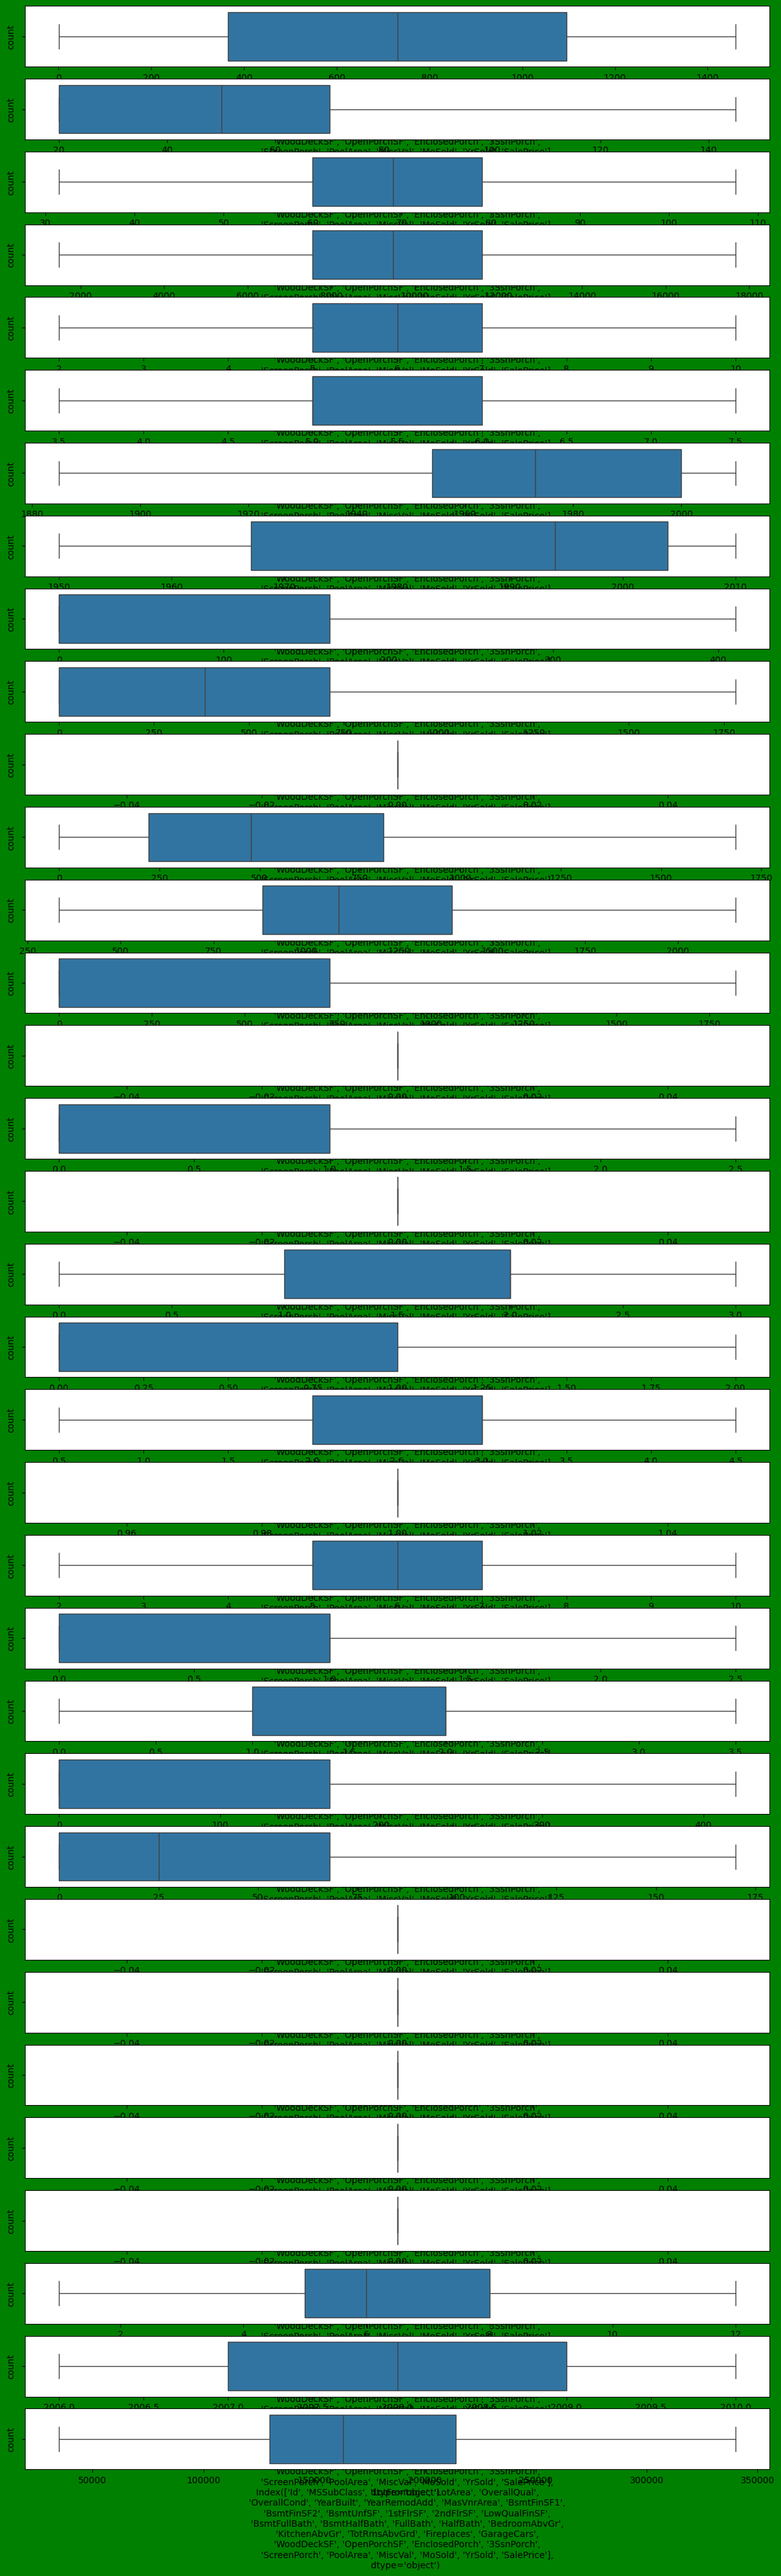

In [100]:
plt.figure(figsize=(15,50),facecolor='green')
plot_number=1
for col in num_col:
    if plot_number<=34:
        ax=plt.subplot(34,1,plot_number)
    sns.boxplot(x=data[col])
    plt.xlabel(num_col)
    plt.ylabel('count')
    plot_number+=1
plt.tight_layout()
plt.show()
        
    

In [101]:
## there is no outliers

# Feature Encoding

### Convert categorical columns into numbers

In [104]:
# spliting categorical columns
cat_col=data.select_dtypes(include=object).columns.tolist()

In [105]:
cat_col

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

## data got converted categorical to numerical

In [107]:
from sklearn.preprocessing import LabelEncoder

In [108]:
data =pd.get_dummies(data, columns=cat_col, drop_first=True)

In [109]:
data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60,65.0,8450.0,7,5.0,2003,2003,196.0,706.0,...,False,False,False,False,True,False,False,False,True,False
1,2.0,20,80.0,9600.0,6,7.5,1976,1976,0.0,978.0,...,False,False,False,False,True,False,False,False,True,False
2,3.0,60,68.0,11250.0,7,5.0,2001,2002,162.0,486.0,...,False,False,False,False,True,False,False,False,True,False
3,4.0,70,60.0,9550.0,7,5.0,1915,1970,0.0,216.0,...,False,False,False,False,True,False,False,False,False,False
4,5.0,60,84.0,14260.0,8,5.0,2000,2000,350.0,655.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60,62.0,7917.0,6,5.0,1999,2000,0.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1456,1457.0,20,85.0,13175.0,6,6.0,1978,1988,119.0,790.0,...,False,False,False,False,True,False,False,False,True,False
1457,1458.0,70,66.0,9042.0,7,7.5,1941,2006,0.0,275.0,...,False,False,False,False,True,False,False,False,True,False
1458,1459.0,20,68.0,9717.0,5,6.0,1950,1996,0.0,49.0,...,False,False,False,False,True,False,False,False,True,False


# MODEL BUILDING

In [111]:
# spliting data 

x=data.drop("SalePrice",axis=True)
y=np.log(data["SalePrice"])

In [112]:
x.shape

(1460, 230)

In [113]:
# train_test_spliting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [114]:
# scaling 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [115]:
#x_train we have to use fit_transform
x_train_scaler=scaler.fit_transform(x_train)

In [116]:
#x_test we have to use transform
x_test_scaler=scaler.transform(x_test)

In [117]:
# converting to dataframe

x_train_scaler=pd.DataFrame(x_train_scaler,columns=x_train.columns)

In [118]:
x_test_scaler=pd.DataFrame(x_test_scaler,columns=x_test.columns)

In [119]:
# create a linear rigression model

from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [120]:
# traning the data
lr.fit(x_train_scaler,y_train)

LinearRegression()

In [121]:
# prediction
y_pred_lr=lr.predict(x_test_scaler)

In [122]:
y_pred_act=np.exp(y_pred_lr)

In [123]:
y_test_act=np.exp(y_test)

In [124]:
# Evaluating the model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [125]:
# on average how much wrong predict the price 
lr_MAE=mean_absolute_error(y_test_act,y_pred_act)

In [126]:
lr_MAE

17371.71282773497

In [127]:
# MAE = average prediction mistake in rupees is 17371.71282773497

In [128]:
# on average how much wrong predict the price 

lr_MSE=mean_squared_error(y_test_act,y_pred_act)

In [129]:
# MSE squares every error and then averages 
lr_MSE

948827685.121184

In [130]:
# root mean square error
lr_RMSE=np.sqrt(lr_MSE)

In [131]:
lr_RMSE

30803.04668569627

In [132]:
# RMSE= my model is wrong by about 30,803/- per house.

In [133]:
lr_r2_score=r2_score(y_test_act,y_pred_act)

In [134]:
lr_r2_score

0.8059359429056756

In [135]:
# 80.6% of the variation in house prices did my model

In [136]:
# implimentionation of adj_r2 score
n=x_test_scaler.shape[0]

In [137]:
n

292

In [138]:
p=x_test_scaler.shape[1]

In [139]:
p

230

In [140]:
# adj_r2_score=1-(1-r2)(n-1)/n-p-1
lr_adj_r2_score=(1-(1-lr_r2_score)*(n-1)/(n-p-1))

In [141]:
lr_adj_r2_score

0.07421900632051803

In [142]:
pd.options.display.float_format = '{:.2f}'.format


In [143]:
# Linear regression output
outcome_lr = pd.DataFrame({
    "Metric": [
        "Mean Absolute Error",
        "Mean Squared Error",
        "Root Mean Squared Error",
        "R2 Score",
        "Adjusted R2 Score"
    ],
    "Outcome": [
        (lr_MAE,2),(
        lr_MSE,2),
        (lr_RMSE,2),(
        lr_r2_score,4),
        (lr_adj_r2_score,4)
    ]
})

outcome_lr


,Metric,Outcome
0,Mean Absolute Error,"(17371.71282773497, 2)"
1,Mean Squared Error,"(948827685.121184, 2)"
2,Root Mean Squared Error,"(30803.04668569627, 2)"
3,R2 Score,"(0.8059359429056756, 4)"
4,Adjusted R2 Score,"(0.07421900632051803, 4)"


# Importing Ridge Model

In [145]:
from sklearn.linear_model import Ridge

In [146]:
# Creating the model & adding alpha controling regularization strenth
ridge=Ridge(alpha=1.0)


In [147]:
# traning the model
ridge.fit(x_train_scaler,y_train)

Ridge()

In [148]:
# predicting the model
y_pred_rd=ridge.predict(x_test_scaler)

In [149]:
# changing target log to noral array
y_pred_rd_act=np.exp(y_pred_rd)

# Evaluating the model

In [151]:
# Evaluating the model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [152]:
rd_MAE=mean_absolute_error(y_test_act,y_pred_rd_act)

In [153]:
rd_MAE

16819.52246810994

In [154]:
rd_MSE=mean_squared_error(y_test_act,y_pred_rd_act)

In [155]:
rd_MSE

813033534.1557062

In [156]:
rd_RMSE=np.sqrt(rd_MSE)

In [157]:
rd_RMSE

28513.74289979669

In [158]:
rd_r2_score=r2_score(y_test_act,y_pred_rd_act)

In [159]:
rd_r2_score

0.833709967925481

In [160]:
rd_adj_r2_score=(1-(1-rd_r2_score)*(n-1)/(n-p-1))

In [161]:
rd_adj_r2_score

0.20671476502155695

In [162]:
pd.options.display.float_format = '{:.2f}'.format


In [163]:
outcome_ridge = pd.DataFrame({
    "Metric": [
        "Mean Absolute Error",
        "Mean Squared Error",
        "Root Mean Squared Error",
        "R2 Score",
        "Adjusted R2 Score"
    ],
    "Outcome": [
        round(rd_MAE, 2),
        round(rd_MSE, 2),
        round(rd_RMSE, 2),
        round(rd_r2_score, 4),
        round(rd_adj_r2_score, 4)
    ]
})

outcome_ridge


,Metric,Outcome
0,Mean Absolute Error,16819.52
1,Mean Squared Error,813033534.16
2,Root Mean Squared Error,28513.74
3,R2 Score,0.83
4,Adjusted R2 Score,0.21


# Lasso Regression

In [165]:
# Lasso Regression will effectively removing useless features. above 2 models adjsted r2 score got less

In [166]:
from sklearn.linear_model import Lasso

In [167]:
# creating the model
lasso=Lasso(alpha=0.001)

In [168]:
# training the model 
lasso.fit(x_train_scaler,y_train)

Lasso(alpha=0.001)

In [169]:
# predicting the model
y_pred_ls=lasso.predict(x_test_scaler)

In [170]:
# converting to log vlaues to normal.
y_pred_ls_act=np.exp(y_pred_ls)

In [171]:
# eluvating the model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [172]:
# mean absoluate error
ls_MAE=mean_absolute_error(y_test_act,y_pred_ls_act)

In [173]:
ls_MAE

16112.533897795849

In [174]:
# mean Squared error
ls_MSE=mean_squared_error(y_test_act,y_pred_ls_act)

In [175]:
ls_MSE

702031607.3278633

In [176]:
# root mean squared error
ls_RMSE=np.sqrt(ls_MSE)

In [177]:
ls_RMSE

26495.87906312722

In [178]:
# r2 score
ls_r2_score=r2_score(y_test_act,y_pred_ls_act)

In [179]:
ls_r2_score

0.856413230702586

In [180]:
# adjusted r2 score
ls_adj_r2_score=(1-(1-ls_r2_score)*(n-1)/(n-p-1))

In [181]:
ls_adj_r2_score

0.3150204940074185

In [182]:
pd.options.display.float_format = '{:.2f}'.format


In [183]:
lasso_outcome=pd.DataFrame({"Metrics":["MAE","MSE","RMSE","r2_score","Adj_r2_score"],"outcome":[ls_MAE,ls_MSE,ls_RMSE,ls_r2_score,ls_adj_r2_score]})

In [184]:
lasso_outcome

,Metrics,outcome
0,MAE,16112.53
1,MSE,702031607.33
2,RMSE,26495.88
3,r2_score,0.86
4,Adj_r2_score,0.32


# Random Forest

In [186]:
# Import Random Forest
from sklearn.ensemble import RandomForestRegressor

In [187]:
# creating the model
rf=RandomForestRegressor(n_estimators=200,random_state=42)

In [188]:
# traning the model
rf.fit(x_train_scaler,y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [189]:
# predicting the model
y_pred_rf=rf.predict(x_test_scaler)

In [190]:
y_pred_rf_act=np.exp(y_pred_rf)

In [191]:
# eluating the model
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [192]:
rf_MAE=mean_absolute_error(y_test_act,y_pred_rf_act)

In [193]:
rf_MAE

15667.040018405529

In [194]:
rf_MSE=mean_squared_error(y_test_act,y_pred_rf_act)

In [195]:
rf_MSE

466701921.5257346

In [196]:
rf_RMSE=np.sqrt(rf_MSE)

In [197]:
rf_RMSE

21603.284970710694

In [198]:
rf_r2_score=r2_score(y_test_act,y_pred_rf_act)

In [199]:
rf_r2_score

0.9045452933496207

In [200]:
rf_adj_r2_score=(1-(1-rf_r2_score)*(n-1)/(n-p-1))

In [201]:
rf_adj_r2_score

0.544634104339994

In [202]:
pd.options.display.float_format = '{:.2f}'.format


In [203]:
outcome_rf = pd.DataFrame({
    "Metric": [
        "Mean Absolute Error",
        "Mean Squared Error",
        "Root Mean Squared Error",
        "R2 Score",
        "Adjusted R2 Score"
    ],
    "Outcome": [
        round(rf_MAE, 2),
        round(rf_MSE, 2),
        round(rf_RMSE, 2),
        round(rf_r2_score, 4),
        round(rf_adj_r2_score, 4)
    ]
})

outcome_rf


,Metric,Outcome
0,Mean Absolute Error,15667.04
1,Mean Squared Error,466701921.53
2,Root Mean Squared Error,21603.28
3,R2 Score,0.90
4,Adjusted R2 Score,0.54


# Gradient Boost

In [205]:
# import gradient boost 

from sklearn.ensemble import GradientBoostingRegressor

In [206]:
# creating the model
gbr=GradientBoostingRegressor(n_estimators=200,learning_rate=0.05,max_depth=3,random_state=42)

In [207]:
# traning the model
gbr.fit(x_train_scaler,y_train)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=200, random_state=42)

In [208]:
# predicting the model
y_pred_gbr=gbr.predict(x_test_scaler)

In [209]:
y_pred_gbr_act=np.exp(y_pred_gbr)

In [210]:
# applying matrix
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [211]:
gbr_MAE=mean_absolute_error(y_test_act,y_pred_gbr_act)

In [212]:
gbr_MAE

14705.304217011224

In [213]:
gbr_MSE=mean_squared_error(y_test_act,y_pred_gbr_act)

In [214]:
gbr_MSE

407480418.1326112

In [215]:
gbr_RMSE=np.sqrt(gbr_MSE)

In [216]:
gbr_RMSE

20186.144211627223

In [217]:
gbr_r2_score=r2_score(y_test_act,y_pred_gbr_act)

In [218]:
gbr_r2_score

0.9166578880766886

In [219]:
gbr_adj_r2_score=(1-(1-gbr_r2_score)*(n-1)/(n-p-1))

In [220]:
gbr_adj_r2_score

0.6024171382019078

In [221]:
pd.options.display.float_format = '{:.2f}'.format


In [222]:
outcome_gbr = pd.DataFrame({
    "Metric": [
        "Mean Absolute Error",
        "Mean Squared Error",
        "Root Mean Squared Error",
        "R2 Score",
        "Adjusted R2 Score"
    ],
    "Outcome": [
        14705.30,
        407480418.13,
        20186.14,
        0.9167,
        0.6024
    ]
})

outcome_gbr


,Metric,Outcome
0,Mean Absolute Error,14705.30
1,Mean Squared Error,407480418.13
2,Root Mean Squared Error,20186.14
3,R2 Score,0.92
4,Adjusted R2 Score,0.60


# XGBOOST REGRESSION

In [224]:
# importing xgboost 

from xgboost import XGBRegressor

In [225]:
# creating the model 
xgb = XGBRegressor(
    n_estimators=300,      # number of trees
    learning_rate=0.05,    # step size
    max_depth=4,           # tree depth
    subsample=0.8,         # use 80% of data per tree
    colsample_bytree=0.8,  # use 80% of features per tree
    random_state=42
)


In [226]:
# traning the model
xgb.fit(x_train_scaler,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [227]:
# predicting the model
y_pred_xgb=xgb.predict(x_test_scaler)

In [228]:
y_pred_xgb_act=np.exp(y_pred_xgb)

In [229]:
# Compute Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [230]:
xgb_MAE=mean_absolute_error(y_test_act,y_pred_xgb_act)

In [231]:
xgb_MAE

13416.618485124149

In [232]:
xgb_MSE=mean_squared_error(y_test_act,y_pred_xgb_act)

In [233]:
xgb_MSE

353155560.477702

In [234]:
xgb_RMSE=np.sqrt(xgb_MSE)

In [235]:
xgb_RMSE

18792.433596469138

In [236]:
xgb_r2_score=r2_score(y_test_act,y_pred_xgb_act)

In [237]:
xgb_r2_score

0.9277689701444898

In [238]:
xgb_adj_r2_score=(1-(1-xgb_r2_score)*(n-1)/(n-p-1))

In [239]:
xgb_adj_r2_score

0.6554224641319103

In [240]:
pd.options.display.float_format = '{:.2f}'.format


In [241]:
outcome_xgb = pd.DataFrame({
    "Metric": [
        "Mean Absolute Error",
        "Mean Squared Error",
        "Root Mean Squared Error",
        "R2 Score",
        "Adjusted R2 Score"
    ],
    "Outcome": [
        round(xgb_MAE, 2),
        round(xgb_MSE, 2),
        round(xgb_RMSE, 2),
        round(xgb_r2_score, 4),
        round(xgb_adj_r2_score, 4)
    ]
})

outcome_xgb


,Metric,Outcome
0,Mean Absolute Error,13416.62
1,Mean Squared Error,353155560.48
2,Root Mean Squared Error,18792.43
3,R2 Score,0.93
4,Adjusted R2 Score,0.66


# Create the comparison DataFrame

In [243]:
Model_comparison=pd.DataFrame({"Model":["LinearRegression","Ridge","Lasso Regression","Random Forest","Gradient Boost","XGBOOST REGRESSION"],"MAE":[lr_MAE,rd_MAE,ls_MAE,rf_MAE,gbr_MAE,xgb_MAE],"MSE":[lr_MSE,rd_MSE,ls_MSE,rf_MSE,gbr_MSE,xgb_MSE],"RMSE":[lr_RMSE,rd_RMSE,ls_RMSE,rf_RMSE,gbr_RMSE,xgb_RMSE],"R2_score":[lr_r2_score,rd_r2_score,ls_r2_score,rf_r2_score,gbr_r2_score,xgb_r2_score],"Adjusted_r2_score":[lr_adj_r2_score,rd_adj_r2_score,ls_adj_r2_score,rf_adj_r2_score,gbr_adj_r2_score,xgb_adj_r2_score]})

In [244]:
Model_comparison

,Model,MAE,MSE,RMSE,R2_score,Adjusted_r2_score
0,LinearRegression,17371.71,948827685.12,30803.05,0.81,0.07
1,Ridge,16819.52,813033534.16,28513.74,0.83,0.21
2,Lasso Regression,16112.53,702031607.33,26495.88,0.86,0.32
3,Random Forest,15667.04,466701921.53,21603.28,0.90,0.54
4,Gradient Boost,14705.30,407480418.13,20186.14,0.92,0.60
5,XGBOOST REGRESSION,13416.62,353155560.48,18792.43,0.93,0.66


# Feature Importance & Interpretation for XGBoost

1. checking what input features influenced house price prediction the most.
2. for better understanding  which factors drive house price.

### extract feature importnace from XGBoost

In [248]:
feature_importance=pd.DataFrame({"feature":x_train.columns,"Importance":xgb.feature_importances_}).sort_values(by="Importance",ascending=False)

In [249]:
feature_importance.head(10)

,feature,Importance
206,GarageFinish_Unf,0.16
4,OverallQual,0.16
182,CentralAir_Y,0.06
23,GarageCars,0.05
17,FullBath,0.04
22,Fireplaces,0.03
189,KitchenQual_TA,0.03
144,ExterQual_TA,0.02
204,GarageType_Detchd,0.02
6,YearBuilt,0.02


In [250]:
Best_features=feature_importance.head(10)

In [251]:
Best_features

,feature,Importance
206,GarageFinish_Unf,0.16
4,OverallQual,0.16
182,CentralAir_Y,0.06
23,GarageCars,0.05
17,FullBath,0.04
22,Fireplaces,0.03
189,KitchenQual_TA,0.03
144,ExterQual_TA,0.02
204,GarageType_Detchd,0.02
6,YearBuilt,0.02


# Visualizing  Top 10 Important Features

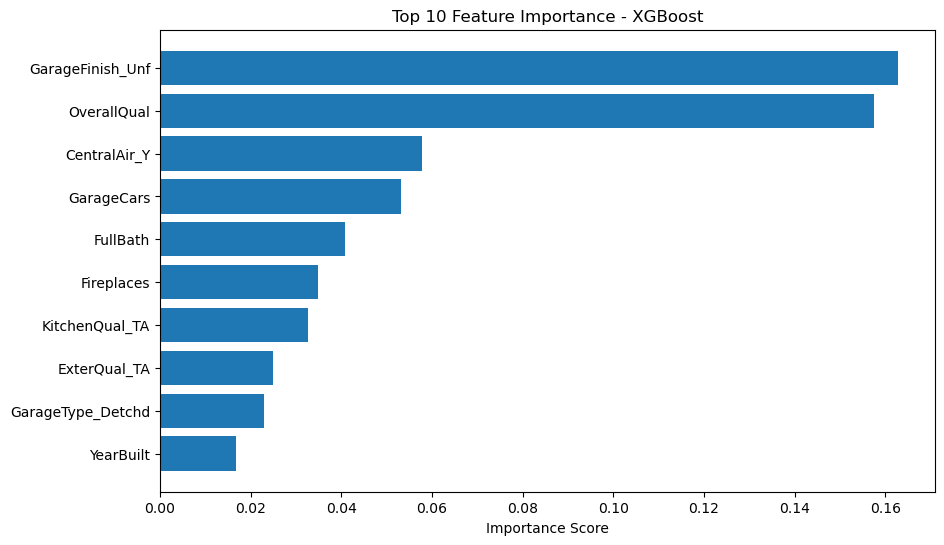

In [253]:
plt.figure(figsize=(10,6))
plt.barh(Best_features["feature"],Best_features["Importance"])
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Top 10 Feature Importance - XGBoost")
plt.show()


### Insights
1. These features influenced house price the most in our XGBoost model.
2. Garage finish status is one of the most influential factors in predicting house price, indicating that garage quality is an important consideration for buyers.
3. Overall quality being the top predictor confirms that better-built houses tend to have higher market value.
4. Presence of central air conditioning significantly impacts house price, showing that modern amenities increase property value.
5. Garage capacity is an important predictor, indicating that houses with larger garages are typically more expensive
6. The number of full bathrooms is positively associated with house value, reflecting buyer preference for more functional living spaces.
7. Fireplaces contribute to higher house valuation, indicating their role as a premium feature.
8. Kitchen quality is a significant factor, showing that well-maintained kitchens influence buyer decisions.
   

# Actual vs Predicted” plot

In [256]:
# checking How close are my model’s predictions to the real house prices.

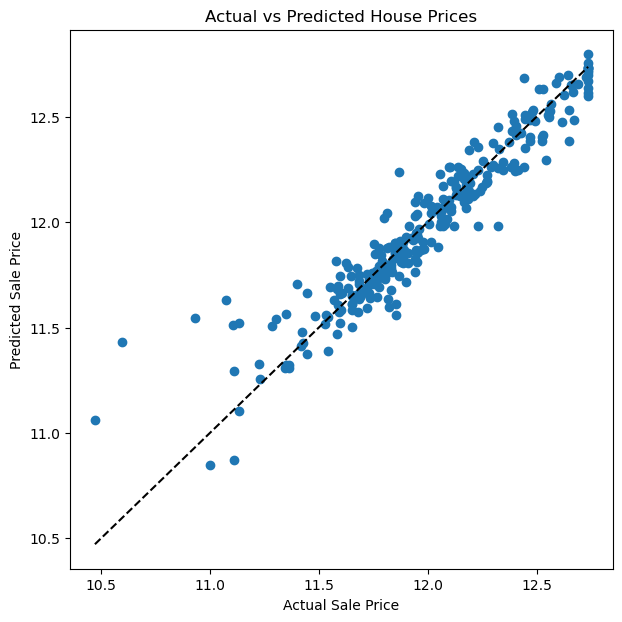

In [257]:
plt.figure(figsize=(7,7))
plt.scatter(y_test,y_pred_xgb)
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         linestyle="--", color="black")

plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

### Insights
1. From the Actual vs Predicted plot, we observe that most points lie close to the diagonal line, indicating that the model is performing reasonably well in predicting house prices.
2. The closer the points are to the diagonal line, the more accurate the predictions are. This suggests that our XGBoost model is able to capture the relationship between features and house price effectively.
3. However, we notice some deviations at very high or very low price ranges, which indicates that the model has slightly lower accuracy for extreme values
4. Overall, the Actual vs Predicted plot confirms that the XGBoost model provides reliable predictions and generalizes well to unseen data.

# Residual Plot

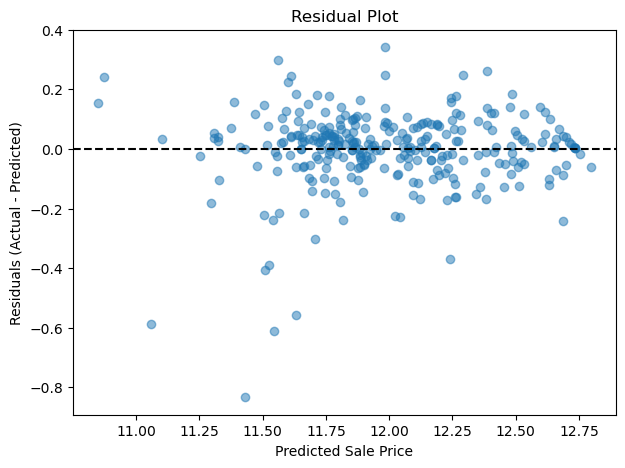

In [260]:
# creating scater plot this for XGBoost
import matplotlib.pyplot as plt

residuals = y_test - y_pred_xgb

plt.figure(figsize=(7,5))
plt.scatter(y_pred_xgb, residuals, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')

plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()


### insights
1. The residual plot shows how far our predictions deviate from actual values.
2. Since most residuals are centered around zero without a clear pattern, our model is performing reasonably well
3. Overall, the residual analysis confirms that the XGBoost model is stable, reliable, and suitable for house price prediction.

# Combined Code (Actual vs Predicted + Residual Plot)

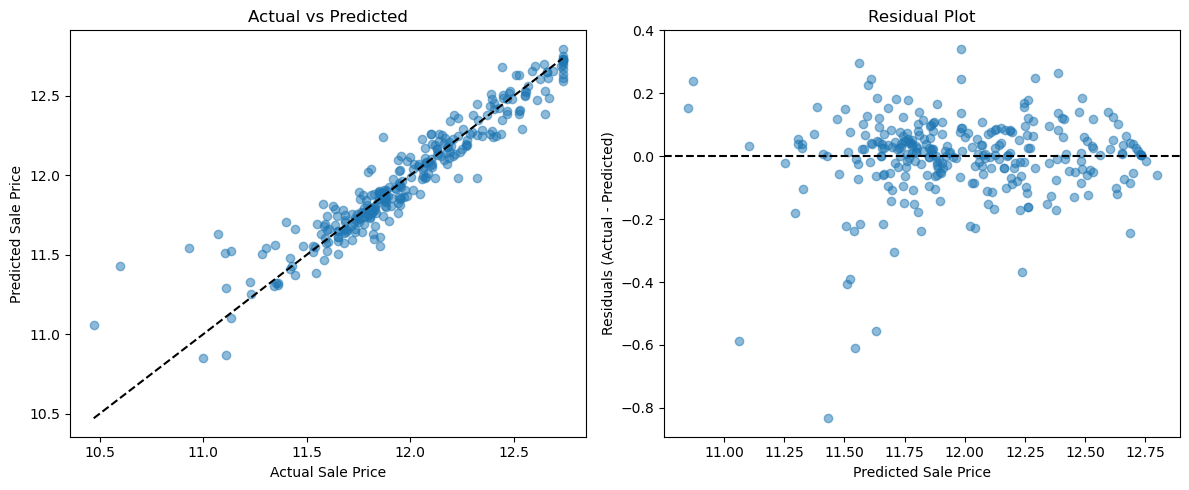

In [263]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred_xgb

# Create two plots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ---- Actual vs Predicted ----
axes[0].scatter(y_test, y_pred_xgb, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             linestyle="--", color="black")
axes[0].set_xlabel("Actual Sale Price")
axes[0].set_ylabel("Predicted Sale Price")
axes[0].set_title("Actual vs Predicted")

# ---- Residual Plot ----
axes[1].scatter(y_pred_xgb, residuals, alpha=0.5)
axes[1].axhline(y=0, color='black', linestyle='--')
axes[1].set_xlabel("Predicted Sale Price")
axes[1].set_ylabel("Residuals (Actual - Predicted)")
axes[1].set_title("Residual Plot")

plt.tight_layout()
plt.show()


### Insights
   Based on Actual vs Predicted and Residual analysis, the XGBoost model demonstrates strong predictive performance, consistency, and reliability, making it suitable for real-world house price prediction.

# Final Project Conclusion (complete write-up)

### Insights
1. Developed and evaluated multiple ML models for house price prediction
2. Performed complete data preprocessing and EDA
3. XGBoost gave the best performance among all models
4. The final model is accurate, stable, and interpretable.

# Model Comparison Summary (why XGBoost is best)

After comparing multiple regression models, XGBoost Regression was selected as the final model due to its superior predictive accuracy, ability to capture non-linear relationships, robustness to noise, and highest R² score. This makes it the most reliable model for house price prediction in this project.”

# Feature Importance + Business Interpretation (Final Section)

Feature importance analysis using XGBoost revealed that Overall Quality, Garage Finish, Central Air, Garage Cars, and Full Bathrooms are the most significant factors influencing house prices. These features reflect key aspects of construction quality, comfort, and usability, which are crucial in real estate valuation. The results demonstrate that the model effectively captures meaningful relationships between property characteristics and market value.

# Suggestions for customer to buy house based on area, price, and requirements

### Customer Recommendations

Based on the model and feature importance analysis:

1) If budget is limited, prefer houses with:
   - Good OverallQual (at least 6 or 7)
   - Smaller but well-maintained property
   - Central Air

2) If family size is large, prioritize:
   - Higher GrLivArea (living area)
   - More FullBath and GarageCars

3) For better resale value, look for:
   - Attached garage (not detached)
   - Finished garage rather than unfinished
   - Newer YearBuilt or recently remodeled homes

4) For lower price but decent value:
   - Choose neighborhoods with moderate pricing
   - Avoid houses with poor exterior or basement quality


# Model Comparison Report

In [274]:
Model_comparison=pd.DataFrame({"Model":["LinearRegression","Ridge","Lasso Regression","Random Forest","Gradient Boost","XGBOOST REGRESSION"],"MAE":[lr_MAE,rd_MAE,ls_MAE,rf_MAE,gbr_MAE,xgb_MAE],"MSE":[lr_MSE,rd_MSE,ls_MSE,rf_MSE,gbr_MSE,xgb_MSE],"RMSE":[lr_RMSE,rd_RMSE,ls_RMSE,rf_RMSE,gbr_RMSE,xgb_RMSE],"R2_score":[lr_r2_score,rd_r2_score,ls_r2_score,rf_r2_score,gbr_r2_score,xgb_r2_score],"Adjusted_r2_score":[lr_adj_r2_score,rd_adj_r2_score,ls_adj_r2_score,rf_adj_r2_score,gbr_adj_r2_score,xgb_adj_r2_score]})

In [275]:
Model_comparison

,Model,MAE,MSE,RMSE,R2_score,Adjusted_r2_score
0,LinearRegression,17371.71,948827685.12,30803.05,0.81,0.07
1,Ridge,16819.52,813033534.16,28513.74,0.83,0.21
2,Lasso Regression,16112.53,702031607.33,26495.88,0.86,0.32
3,Random Forest,15667.04,466701921.53,21603.28,0.90,0.54
4,Gradient Boost,14705.30,407480418.13,20186.14,0.92,0.60
5,XGBOOST REGRESSION,13416.62,353155560.48,18792.43,0.93,0.66


### insights
1. All models show a gradual improvement from Linear Regression → XGBoost.
2. This indicates that tree-based and ensemble models handle this dataset better than simple linear models.
3. Lower MAE, MSE, and RMSE in XGBoost confirm that it makes the most accurate predictions.
4. R² improves consistently across models
5. XGBoost captures the underlying relationship between features and price better than all other models.
6. XGBoost provides the best balance between accuracy and generalization.
7. GBoost is the best model because it has the lowest prediction error and highest R² and Adjusted R² scores

# Challenges Faced Report

### Insights

1) Missing Values:
- Many columns had high missing percentages.
- Solution: Dropped columns with >50% missing values and imputed others.

2) Outliers:
- Several numerical features had extreme values.
- Solution: Used IQR method and replaced outliers with median.

3) High Dimensionality after Encoding:
- One-hot encoding increased columns significantly.
- Solution: Used feature selection and correlation analysis to reduce redundancy.

4) Multicollinearity:
- Some features were highly correlated.
- Solution: Dropped redundant features based on correlation threshold.

5) Model Performance:
- Linear models initially performed poorly.
- Solution: Used tree-based models like Random Forest, Gradient Boost, and XGBoost.


# A final flow diagram

Raw Housing Dataset  
        ↓  
Data Cleaning & Preprocessing  
• Missing Value Treatment  
• Outlier Handling  
• Encoding Categorical Variables  
• Feature Scaling  
        ↓  
Exploratory Data Analysis (EDA)  
• Univariate Analysis  
• Bivariate Analysis  
• Correlation Heatmap  
        ↓  
Feature Engineering & Selection  
• Handling Multicollinearity  
• Removing Redundant Features  
        ↓  
Model Training  
• Linear Regression  
• Ridge Regression  
• Lasso Regression  
• Random Forest  
• Gradient Boost  
• XGBoost  
        ↓  
Model Performance Evaluation  
• MAE, MSE, RMSE  
• R² and Adjusted R²  
        ↓  
Best Model Selection  
→ XGBoost Regression  
        ↓  
Model Validation  
• Actual vs Predicted Plot  
• Residual Analysis  
        ↓  
Feature Importance Interpretation  
        ↓  
Final House Price Prediction  
